In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the data

In [3]:
indus_client_df=pd.read_csv(r'C:\Users\HP\Desktop\Skygeni\industry_client_details.csv')
payments_df = pd.read_csv(r'C:\Users\HP\Desktop\Skygeni\payment_information.csv')
finance_df = pd.read_csv(r'C:\Users\HP\Desktop\Skygeni\finanical_information.csv')
sub_df=pd.read_csv(r'C:\Users\HP\Desktop\Skygeni\subscription_information.csv')

## DATA CLEANING AND PREPROCESSING

## Industry client information

In [4]:
indus_client_df.sample(10)

,client_id,company_size,industry,location
81,9329180414,Small,Block Chain,Banglore
99,6209923307,Medium,Gaming,Chennai
31,5481743788,Large,Block Chain,Banglore
87,7744303708,Medium,Gaming,New Delhi
47,7925430606,Large,Block Chain,New Delhi
46,2486393352,Large,Gaming,Chennai
36,6292156167,Small,Block Chain,Mumbai
53,8540187780,Large,Finance Lending,Hyderabad
79,2315920532,Small,Gaming,Chennai
24,8719792472,Medium,Hyper Local,Hyderabad


In [5]:
indus_client_df.shape

(100, 4)

In [6]:
indus_client_df.info() #no null values and data types are also proper

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   client_id     100 non-null    int64 
 1   company_size  100 non-null    object
 2   industry      100 non-null    object
 3   location      100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [7]:
# to check for any inconsistency in data
display(indus_client_df['client_id'].nunique()) # all ids are unique
display(indus_client_df['company_size'].value_counts()) # no category is repeated with different name
display(indus_client_df['industry'].value_counts())
display(indus_client_df['location'].value_counts())

100

company_size
Small     39
Medium    32
Large     29
Name: count, dtype: int64

industry
Block Chain        25
Finance Lending    22
Gaming             22
Hyper Local        20
AI                 11
Name: count, dtype: int64

location
Hyderabad    23
Chennai      20
New Delhi    20
Banglore     20
Mumbai       17
Name: count, dtype: int64

## Financial information

In [8]:
finance_df.sample(10)

,Unnamed: 0,start_date,end_date,inflation_rate,gdp_growth_rate
11,11,2020-10-01,2020-12-31,3.10,2.70
19,19,2022-10-01,2022-12-31,4.40,1.05
15,15,2021-10-01,2021-12-31,7.32,1.73
2,2,2018-07-01,2018-09-30,1.56,1.82
5,5,2019-04-01,2019-06-30,3.84,3.48
10,10,2020-07-01,2020-09-30,1.43,2.40
14,14,2021-07-01,2021-09-30,7.19,1.04
4,4,2019-01-01,2019-03-31,6.91,3.44
17,17,2022-04-01,2022-06-30,6.80,3.49
16,16,2022-01-01,2022-03-31,6.76,2.72


In [9]:
finance_df.shape

(21, 5)

In [10]:
finance_df.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       21 non-null     int64  
 1   start_date       21 non-null     object 
 2   end_date         21 non-null     object 
 3   inflation_rate   21 non-null     float64
 4   gdp_growth_rate  21 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 968.0+ bytes


In [11]:
# we need to delete unnamed column or rename it to row_id and change the datatype for date from object to datetime
finance_df.rename(columns={'Unnamed: 0': 'row_id'}, inplace=True)
finance_df['start_date'] = pd.to_datetime(finance_df['start_date'])
finance_df['end_date'] = pd.to_datetime(finance_df['end_date'])

## Subscription information

In [12]:
sub_df.sample(10)

,client_id,subscription_type,start_date,end_date,renewed
52,1629048404,Yearly,2021-02-23,2022-02-23,False
27,8155233099,Monthly,2020-06-03,2020-07-03,True
25,9752784850,Yearly,2021-09-15,2022-09-15,False
38,2490056820,Monthly,2020-04-04,2020-05-04,True
94,5481743788,Yearly,2020-04-03,2021-04-03,False
57,9031632460,Yearly,2019-07-06,2020-07-05,True
74,2315920532,Monthly,2019-04-01,2019-05-01,True
88,7925430606,Yearly,2022-08-29,2023-08-29,False
55,5983139564,Yearly,2020-03-29,2021-03-29,True
18,2096479553,Yearly,2020-01-25,2021-01-24,False


In [13]:
sub_df.shape

(100, 5)

In [14]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   client_id          100 non-null    int64 
 1   subscription_type  100 non-null    object
 2   start_date         100 non-null    object
 3   end_date           100 non-null    object
 4   renewed            100 non-null    bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 3.3+ KB


In [15]:
sub_df['start_date'] = pd.to_datetime(sub_df['start_date'])
sub_df['end_date'] = pd.to_datetime(sub_df['end_date'])

In [16]:
sub_df['subscription_type'].value_counts()

subscription_type
Monthly    57
Yearly     43
Name: count, dtype: int64

## Payment information

In [17]:
payments_df.sample(10)

,client_id,payment_date,amount_paid,payment_method
89,5980553707,8/30/2021,312.9,Credit Card
28,4687291312,6/14/2019,184.2,Bank Transfer
22,9626357024,9/25/2022,275.5,Check
5,8719792472,2/10/2018,73.8,Credit Card
44,4309371709,5/24/2021,368.4,Check
50,7896208406,2/24/2022,291.0,Credit Card
2,4698004907,9/11/2021,435.1,Check
51,7925430606,8/29/2022,407.6,Bank Transfer
82,1298566280,9/1/2019,480.3,Credit Card
54,5481743788,4/3/2020,289.2,Credit Card


In [18]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       100 non-null    int64  
 1   payment_date    100 non-null    object 
 2   amount_paid     100 non-null    float64
 3   payment_method  100 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


In [19]:
payments_df['payment_method'].value_counts()

payment_method
Bank Transfer    38
Check            31
Credit Card      31
Name: count, dtype: int64

In [20]:
payments_df['payment_date'] = pd.to_datetime(payments_df['payment_date'], errors='coerce') # changed datatype to date

## Assignment questions

1.	How many finance lending and blockchain clients does the organization have?  
 


In [21]:
industry_counts = indus_client_df.groupby('industry')['client_id'].count()
indus_counts_res = industry_counts.loc[['Finance Lending', 'Block Chain']]
indus_counts_res


industry
Finance Lending    22
Block Chain        25
Name: client_id, dtype: int64

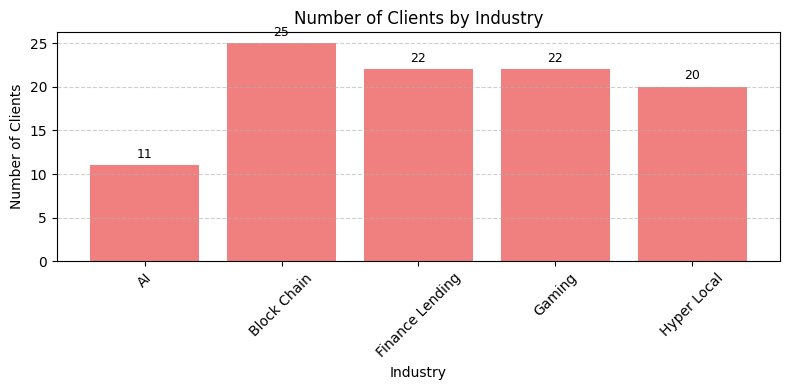

In [22]:
plt.figure(figsize=(8,4))
bars = plt.bar(industry_counts.index, industry_counts.values, color='lightcoral')

plt.title('Number of Clients by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, 
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.show()

2.	Which industry in the organization has the highest renewal rate?

In [23]:
# for this we need to join two tables - subscriptions and industry clients
industry_sub = indus_client_df.merge(sub_df,on='client_id')
industry_renewals = industry_sub.groupby(['industry','renewed'])['client_id'].count().unstack(fill_value=0)

In [24]:
industry_renewals['renewal_rate'] = industry_renewals[True] / (industry_renewals[True] + industry_renewals[False])
highest_renewal_industry = industry_renewals['renewal_rate'].idxmax()
highest_renewal_rate = industry_renewals['renewal_rate'].max()

print(f"Highest renewal rate is in '{highest_renewal_industry}' with a rate of {highest_renewal_rate:.2f}")


Highest renewal rate is in 'Gaming' with a rate of 0.73


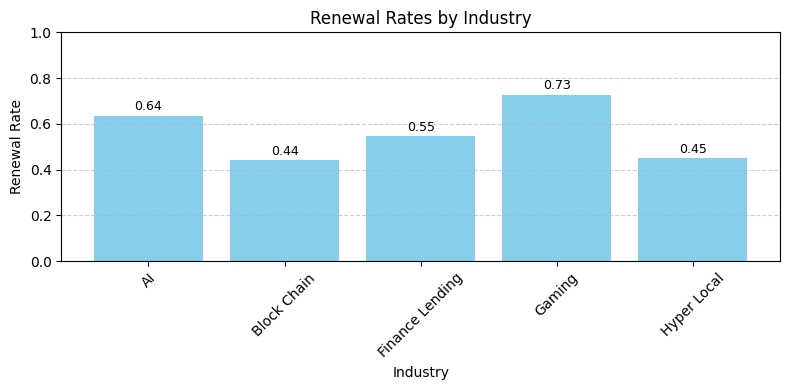

In [ ]:

plt.figure(figsize=(8,4))
bars = plt.bar(industry_renewals.index, industry_renewals['renewal_rate'], color='skyblue')

plt.title('Renewal Rates by Industry')
plt.xlabel('Industry')
plt.ylabel('Renewal Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1) 
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, 
             f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.show()


3.	What was the average inflation rate when their subscriptions were renewed?

In [ ]:
renewed_subscriptions = sub_df[sub_df['renewed'] == True]
inflation_rates = []
for _, row in renewed_subscriptions.iterrows():
    sub_start = row['start_date']
    sub_end = row['end_date']
    subscription_type = row['subscription_type']

    # if it is a yearly plan then it cannot directly fall into quarter range
    if subscription_type == 'Yearly':
        for _, quarter in finance_df.iterrows():
            # to check if the subscription period overlaps with the quarter's period
            if (sub_start <= quarter['end_date']) and (sub_end >= quarter['start_date']):
                inflation_rates.append(quarter['inflation_rate'])
    
    # If it's a monthly plan, directly map to the appropriate quarter
    elif subscription_type == 'Monthly':
        for _, quarter in finance_df.iterrows():
            if sub_start >= quarter['start_date'] and sub_end <= quarter['end_date']:
                inflation_rates.append(quarter['inflation_rate'])

# average inflation rate for the renewed subscriptions
if inflation_rates:
    average_inflation_rate = sum(inflation_rates) / len(inflation_rates)
    print("Average Inflation Rate for Renewed Subscriptions:", average_inflation_rate)
else:
    print("No valid inflation rates found for renewed subscriptions.")
print(inflation_rates)

Average Inflation Rate for Renewed Subscriptions: 4.396283185840705
[0.76, 7.32, 6.76, 6.8, 5.6, 4.4, 6.76, 6.8, 5.6, 4.4, 5.49, 3.84, 7.71, 2.71, 4.4, 4.69, 4.4, 5.49, 2.78, 6.91, 3.84, 7.71, 2.71, 7.71, 7.19, 4.4, 5.49, 7.19, 7.32, 6.76, 6.8, 5.6, 1.17, 7.71, 2.71, 1.17, 1.56, 2.78, 6.91, 3.84, 1.17, 4.69, 1.43, 3.1, 2.57, 0.76, 4.69, 6.76, 6.8, 5.6, 4.4, 5.49, 4.69, 1.43, 3.1, 2.57, 0.76, 6.76, 7.71, 3.1, 0.76, 4.4, 4.69, 1.43, 3.1, 2.57, 7.71, 2.71, 4.4, 4.69, 1.43, 4.4, 2.57, 0.76, 7.19, 7.32, 6.76, 1.17, 5.77, 1.17, 1.56, 2.78, 6.91, 2.78, 6.91, 3.84, 7.71, 2.71, 3.84, 3.84, 3.1, 2.57, 0.76, 7.19, 7.32, 5.6, 4.4, 5.49, 1.43, 7.71, 2.71, 4.4, 4.69, 1.43, 7.71, 2.71, 4.4, 4.69, 1.43, 4.4, 3.1, 7.32, 2.57]


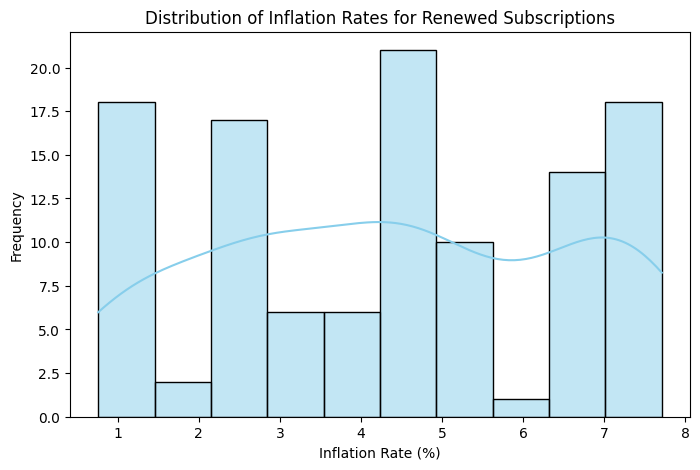

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(inflation_rates, kde=True, color='skyblue', bins=10)
plt.title("Distribution of Inflation Rates for Renewed Subscriptions")
plt.xlabel("Inflation Rate (%)")
plt.ylabel("Frequency")
plt.show()

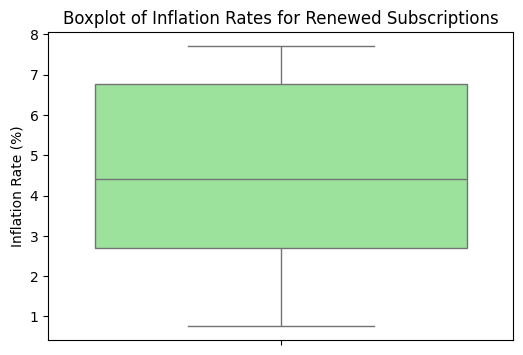

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(y=inflation_rates, color='lightgreen')
plt.title("Boxplot of Inflation Rates for Renewed Subscriptions")
plt.ylabel("Inflation Rate (%)")
plt.show()


4.	What is the median amount paid each year for all payment methods? 

In [29]:
payments_df['year'] = payments_df['payment_date'].dt.year # extract year
median_amount = payments_df.groupby(['year', 'payment_method'])['amount_paid'].median().reset_index() # group by year and payment method

display(median_amount)

,year,payment_method,amount_paid
0,2018,Bank Transfer,281.65
1,2018,Check,216.60
2,2018,Credit Card,229.15
3,2019,Bank Transfer,184.20
4,2019,Check,410.20
5,2019,Credit Card,401.90
6,2020,Bank Transfer,225.10
7,2020,Check,413.10
8,2020,Credit Card,285.25
9,2021,Bank Transfer,255.30


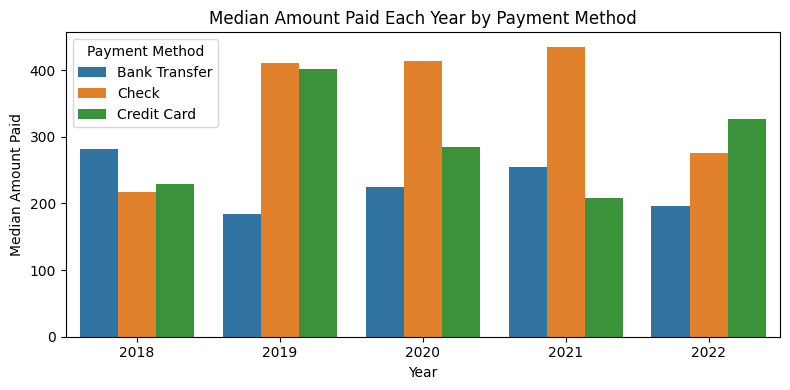

In [30]:
plt.figure(figsize=(8, 4))
sns.barplot(data=median_amount, x='year', y='amount_paid', hue='payment_method')
plt.title('Median Amount Paid Each Year by Payment Method')
plt.xlabel('Year')
plt.ylabel('Median Amount Paid')
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()

## Writing results to file

In [31]:
with open('data_analysis_results.txt', 'w') as f:
    
    # client counts for Finance Lending and Block Chain--  question:1 
    f.write("Number of Clients in 'Finance Lending' and 'Block Chain':\n")
    for industry, count in indus_counts_res.items():
        f.write(f"{industry}: {count}\n")
    f.write("\n")

    # question:2
    f.write(f"Highest renewal rate is in '{highest_renewal_industry}' with a rate of {highest_renewal_rate:.2f}")
    f.write("\n")
    #Question:3

    f.write("\nAverage Inflation Rate for Renewed Subscriptions: ")
    if average_inflation_rate is not None:
        f.write(f"{average_inflation_rate:.2f}")
    else:
        f.write("No valid inflation rates found.")

    f.write("\n")
    #Question:4
    f.write("\nMedian Amount Paid Each Year by Payment Method:\n")
    for _, row in median_amount.iterrows():
        f.write(f"Year: {row['year']}, Payment Method: {row['payment_method']}, Median Amount Paid: {row['amount_paid']:.2f}\n")

    